In [1]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('customers.csv', encoding='utf-8')
customers.head()

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [3]:
customers.shape

(162, 13)

In [4]:
customers.dtypes

Unnamed: 0            int64
﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [5]:
df1 = customers.copy()

In [6]:
df1.columns.array

<PandasArray>
[       'Unnamed: 0',  '\ufeffcustomerid',            'entity',
              'name',           'surname',        'birth_date',
               'sex',           'country',             'state',
           'purpose', 'deal_satisfaction',          'mortgage',
            'source']
Length: 13, dtype: object

In [7]:
df1 = df1.rename(columns= {'\ufeffcustomerid':'customerid'})
df1.head()

,Unnamed: 0,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [8]:
df1.describe(include="all")

,Unnamed: 0,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162.000000,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,NaN,162,2,159,156,151,2,9,9,2,NaN,2,3
top,NaN,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,NaN,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,80.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,46.909487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,40.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,80.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,120.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [9]:
df1.dtypes

Unnamed: 0            int64
customerid           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [10]:
df1['entity'] = df1['entity'].map({'Individual':1,'Company':0})

In [11]:
df1['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [12]:
df1['sex'] = df1['sex'].map({'F':'1','M':'0', '':pd.NA})
df1['purpose'] = df1['purpose'].str.lower()
df1['source'] = df1['source'].str.lower()
df1['mortgage'] = df1['mortgage'].map({'No':0,'Yes':1})
df1['full_name'] = df1['name'] + " " + df1['surname']

In [13]:
df1 = df1.drop(['Unnamed: 0'],axis=1)
df1 = df1.drop(['name', 'surname'], axis=1)

In [14]:
df1.head()

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


In [15]:
df1.dtypes

customerid           object
entity                int64
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage              int64
source               object
full_name            object
dtype: object

In [16]:
df1.isna().sum()

customerid           0
entity               0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
full_name            0
dtype: int64

In [17]:
properties = pd.read_csv('properties.csv')
properties.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [18]:
properties.shape

(267, 10)

In [19]:
properties.dtypes

Unnamed: 0      int64
﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [20]:
data = properties.copy()

In [21]:
data.describe(include='all')

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,133.000000,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,77.220464,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,0.000000,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,66.500000,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,133.000000,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,199.500000,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [22]:
data.columns.array

<PandasArray>
['Unnamed: 0',   '\ufeffid',   'building',  'date_sale',       'type',
  'property#',       'area',      'price',     'status', 'customerid']
Length: 10, dtype: object

In [23]:
data = data.rename(columns= {'\ufeffid':'id'})
data.head()

,Unnamed: 0,id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [24]:
data['id'] = data['id'].astype(str)
data['id']

0      1030
1      1029
2      2002
3      2031
4      1049
       ... 
262    5044
263    5047
264    5048
265    5050
266    5051
Name: id, Length: 267, dtype: object

In [25]:
data['building'] = data['building'].astype(str)
data['property#'] = data['property#'].astype(str)

data.dtypes

Unnamed: 0      int64
id             object
building       object
date_sale      object
type           object
property#      object
area          float64
price          object
status         object
customerid     object
dtype: object

In [26]:
data['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [27]:
data['date_sale'] = np.where(data['date_sale']=='#NUM!', pd.NA, data['date_sale'])

In [28]:
data['date_sale'] = pd.to_datetime(data['date_sale'])
data['date_sale']

0     2005-11-01
1     2005-10-01
2     2007-07-01
3     2007-12-01
4     2004-11-01
         ...    
262          NaT
263          NaT
264          NaT
265          NaT
266          NaT
Name: date_sale, Length: 267, dtype: datetime64[ns]

In [29]:
data['type'] = data['type'].str.lower()

In [30]:
data.head()

,Unnamed: 0,id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


In [31]:
data.dtypes

Unnamed: 0             int64
id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
price                 object
status                object
customerid            object
dtype: object

In [32]:
data['price$'] = data['price'].str.strip('$')
data.head()

,Unnamed: 0,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,"246,172.68"
1,1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,"246,331.90"
2,2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,"209,280.91"
3,3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,"452,667.01"
4,4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,"467,083.31"


In [33]:
data['price$']= data['price$'].replace(",","",regex=True) 

In [34]:
data['price$'] = data['price$'].astype(float)

In [35]:
data = data.drop(['price'],axis=1)
data = data.drop(['Unnamed: 0'],axis=1)

In [36]:
data.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
status                object
customerid            object
price$               float64
dtype: object

In [37]:
data['status'].unique()

array([' Sold ', '-'], dtype=object)

In [38]:
data['status'] = data['status'].str.strip()
data['status'] = data['status'].str.lower()

data['status'].unique()

array(['sold', '-'], dtype=object)

In [39]:
data = data.rename(columns= {'status':'sold'})

In [40]:
data['sold'] = data['sold'].map({'sold':1,'-':0})
data['sold'].unique()

array([1, 0], dtype=int64)

In [41]:
data.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
sold                   int64
customerid            object
price$               float64
dtype: object

In [42]:
data.isna().sum()

id             0
building       0
date_sale     72
type           0
property#      0
area           0
sold           0
customerid    72
price$         0
dtype: int64

In [43]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [44]:
df1.customerid.unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [45]:
data.customerid.unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [46]:
data['customerid'] = data['customerid'].str.strip()
df1['customerid'] = df1['customerid'].str.strip()

In [47]:
data['customerid'].nunique()

162

In [48]:
data['customerid'] = np.where(data['customerid']=='', pd.NA, data['customerid'])

In [49]:
dataset=pd.merge(data, df1, on='customerid', how='left')

In [50]:
dataset.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,6/21/1986,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,2/24/1983,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,12/27/1985,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,12/27/1985,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,5/15/1979,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [51]:
dataset.shape

(267, 19)

In [52]:
dataset.tail()

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5051,5,NaT,apartment,51,789.25,0,NaN,199216.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
dataset.fillna(pd.NA)

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,6/21/1986,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,2/24/1983,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,12/27/1985,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,12/27/1985,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,5/15/1979,1,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
dataset.dtypes

id                           object
building                     object
date_sale            datetime64[ns]
type                         object
property#                    object
area                        float64
sold                          int64
customerid                   object
price$                      float64
entity                      float64
birth_date                   object
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                    float64
source                       object
full_name                    object
dtype: object

### Variables

id : Identifiant unique pour chaque transaction ou enregistrement.

building : Nom ou identifiant du bâtiment où la propriété est située.

date_sale : Date à laquelle la vente a été effectuée.

type : Type de propriété vendue (par exemple, appartement, maison, terrain, etc.).

property# : Numéro unique de la propriété au sein du bâtiment ou du registre.

area : Superficie de la propriété, probablement exprimée en mètres carrés ou une autre unité.

sold : Indicateur binaire ou booléen qui indique si la propriété a été vendue (ex. : 1 pour vendu, 0 pour non vendu).

customerid : Identifiant unique du client ayant acheté ou interagi avec la propriété.

price$ : Prix de vente de la propriété, probablement en dollars ou une autre devise.

entity : Type d'entité ayant réalisé la transaction (par exemple, particulier, entreprise, promoteur immobilier).

birth_date : Date de naissance du client.

sex : Sexe du client (par exemple, M pour masculin, F pour féminin).

country : Pays où se trouve la propriété ou d'origine du client.

state : État ou région où se trouve la propriété.

purpose : Raison ou objectif de l'achat (par exemple, résidence principale, investissement locatif, etc.).

deal_satisfaction : Niveau de satisfaction du client concernant la transaction, potentiellement mesuré sur une échelle (ex. : 1 à 5).

mortgage : Indicateur binaire ou booléen qui montre si un prêt hypothécaire a été utilisé (1 pour oui, 0 pour non).

source : Source d'information qui a conduit à la vente (par exemple, publicité, recommandation, site web, etc.).

full_name : Nom complet du client.

age_at_purchase : Âge du client au moment de l'achat.

age_at_purchase_rounded : Âge du client, arrondi à l'entier le plus proche.

age_interval : Intervalle d'âge dans lequel le client se situe (par exemple, 20-30 ans, 30-40 ans, etc.).

price_interval : Intervalle de prix de la propriété (par exemple, 100k-200k, 200k-300k, etc.).

year_sale : Année de la vente de la propriété.

In [55]:
df = dataset.copy()

In [56]:
df.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,6/21/1986,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,2/24/1983,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,12/27/1985,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,12/27/1985,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,5/15/1979,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [57]:
df.describe

<bound method NDFrame.describe of        id building  date_sale       type property#     area  sold customerid  \
0    1030        1 2005-11-01  apartment        30   743.09     1      C0028   
1    1029        1 2005-10-01  apartment        29   756.21     1      C0027   
2    2002        2 2007-07-01  apartment         2   587.28     1      C0112   
3    2031        2 2007-12-01  apartment        31  1604.75     1      C0160   
4    1049        1 2004-11-01  apartment        49  1375.45     1      C0014   
..    ...      ...        ...        ...       ...      ...   ...        ...   
262  5044        5        NaT  apartment        44  1238.58     0        NaN   
263  5047        5        NaT  apartment        47   794.52     0        NaN   
264  5048        5        NaT  apartment        48  1013.27     0        NaN   
265  5050        5        NaT  apartment        50  1074.71     0        NaN   
266  5051        5        NaT  apartment        51   789.25     0        NaN   

     

In [58]:
df['building'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [59]:
df.groupby('building')

In [60]:
columns_of_interest = ['building', 'sold','mortgage']

totals_by_building = df[columns_of_interest].groupby("building").sum()
totals_by_building 

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


In [61]:
columns_of_interest = ['building', 'area', 'price$', 'deal_satisfaction']

averages_by_building = df[columns_of_interest].groupby("building").mean()
averages_by_building

,area,price$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


In [62]:
columns_of_interest = ['country', 'sold','mortgage']
totals_by_country = df[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [63]:
df['country'].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [64]:
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['id', 'building', 'type', 'property#', 'customerid', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'source', 'full_name'],
      dtype='object')

In [65]:
data[object_columns] = df[object_columns].apply(lambda x: x.str.strip())

In [66]:
totals_by_country = df[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [67]:
columns_of_interest = ['country', 'area', 'deal_satisfaction','price$']

averages_by_country = df[columns_of_interest].groupby("country").mean()
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.00000,229075.470000
Canada,917.382857,5.00000,274069.384286
Denmark,785.480000,1.00000,257183.480000
Germany,743.410000,5.00000,205098.210000
Mexico,1283.450000,3.00000,338181.180000
Russia,903.757500,2.50000,278828.835000
UK,739.480000,4.00000,220142.680000
USA,901.756545,3.49697,270708.407030
USA,887.565833,4.75000,261679.335000


In [68]:
columns_of_interest = ['state', 'sold','mortgage']
totals_by_state = df[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,11,3.0
California,120,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [69]:
totals_by_state.sold.sum()

181

In [70]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [71]:
df['state'] = np.where(df['state']=='', pd.NA, df['state'])
df['state'] = np.where(df['country']!='USA', pd.NA, df['state'])

In [72]:
totals_by_state = df[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,9,3.0
California,106,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [73]:
totals_by_state.sold.sum()

165

In [74]:
columns_of_interest = ['state', 'sold']

sold_by_state = df[columns_of_interest].groupby("state").sum()
sold_by_state

,sold
state,
Arizona,9
California,106
Colorado,11
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


In [75]:
sold_by_state = sold_by_state.sort_values('sold', ascending=False)
sold_by_state

,sold
state,
California,106
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [76]:
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
California,106
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [77]:
sold_by_state['relative_frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative_frequency
state,,
California,106,0.642424
Nevada,17,0.103030
Colorado,11,0.066667
Oregon,11,0.066667
Arizona,9,0.054545
Utah,5,0.030303
Virginia,4,0.024242
Kansas,1,0.006061
Wyoming,1,0.006061


In [78]:
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,106,0.642424,0.642424
Nevada,17,0.103030,0.745455
Colorado,11,0.066667,0.812121
Oregon,11,0.066667,0.878788
Arizona,9,0.054545,0.933333
Utah,5,0.030303,0.963636
Virginia,4,0.024242,0.987879
Kansas,1,0.006061,0.993939
Wyoming,1,0.006061,1.000000


In [79]:
df.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,6/21/1986,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,2/24/1983,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,12/27/1985,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,12/27/1985,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,5/15/1979,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [80]:
df['date_sale'] = pd.to_datetime(df['date_sale'], errors='coerce')  # Convert to datetime
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')  # Convert to datetime

df['age_at_purchase'] = df['date_sale'] - df['birth_date']
df['age_at_purchase']

0     7073 days
1     8255 days
2     7856 days
3     8009 days
4     9302 days
         ...   
262         NaT
263         NaT
264         NaT
265         NaT
266         NaT
Name: age_at_purchase, Length: 267, dtype: timedelta64[ns]

In [81]:
type(df['age_at_purchase'][0].days)

int

In [82]:
df['age_at_purchase'] = (df['date_sale'] - df['birth_date']).dt.days / 365  # Calculate age in years
df['age_at_purchase']

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [83]:
df['age_at_purchase_rounded'] = df['age_at_purchase'].apply(lambda x: np.floor(x))
df['age_at_purchase_rounded']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase_rounded, Length: 267, dtype: float64

In [84]:
df['age_interval'] = pd.cut(df['age_at_purchase'], bins = 10, precision = 0)
df['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 31.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 31.0] < (31.0, 36.0] < (36.0, 42.0] ... (54.0, 59.0] < (59.0, 65.0] < (65.0, 71.0] < (71.0, 76.0]]

In [85]:
columns_of_interest = ['age_interval', 'sold']
sold_by_age = df[columns_of_interest].groupby("age_interval").sum()
sold_by_age

,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


In [86]:
df['price_interval'] = pd.cut(df['price$'], bins=10)
df['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

In [87]:
columns_of_interest = ['price_interval', 'sold']
all_properties_by_price = df[columns_of_interest].groupby("price_interval").count()

# Here, 'sold' simply represents a count, so it's more fitting to rename the column as 'count'.
all_properties_by_price = all_properties_by_price.rename(columns={'sold':'count'})
all_properties_by_price

,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


In [88]:
columns_of_interest = ['price_interval', 'sold']
sold_properties_by_price = df[columns_of_interest].groupby("price_interval").sum()
sold_properties_by_price

,sold
price_interval,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


In [89]:
all_properties_by_price['not_sold'] = all_properties_by_price['count'] - sold_properties_by_price['sold']
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold,sold
price_interval,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


In [90]:
df.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [91]:
data_sold = df[df['sold']==1]

In [92]:
data_sold = data_sold[data_sold['entity']==1]

In [93]:
data_sold[['age_at_purchase','price$']]

,age_at_purchase,price$
0,19.378082,246172.68
1,22.616438,246331.90
2,21.523288,209280.91
3,21.942466,452667.01
4,25.484932,467083.31
...,...,...
173,70.846575,204292.49
174,72.849315,261579.89
175,73.038356,222867.42
176,72.778082,291494.36


In [94]:
np.cov(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.68344293e+02, -1.77726142e+05],
       [-1.77726142e+05,  6.16619957e+09]])

In [95]:
np.corrcoef(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.        , -0.17443889],
       [-0.17443889,  1.        ]])

In [96]:
data_sold_no_na = data_sold.dropna()
np.corrcoef(data_sold_no_na['age_at_purchase'], data_sold_no_na['price$'])#, ddof=1)

array([[ 1.        , -0.20106272],
       [-0.20106272,  1.        ]])

In [97]:
data_sold_no_na[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.201063
price$,-0.201063,1.000000


In [98]:
data_sold[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


In [99]:
df[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


In [100]:
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.00000,229075.470000
Canada,917.382857,5.00000,274069.384286
Denmark,785.480000,1.00000,257183.480000
Germany,743.410000,5.00000,205098.210000
Mexico,1283.450000,3.00000,338181.180000
Russia,903.757500,2.50000,278828.835000
UK,739.480000,4.00000,220142.680000
USA,901.756545,3.49697,270708.407030
USA,887.565833,4.75000,261679.335000


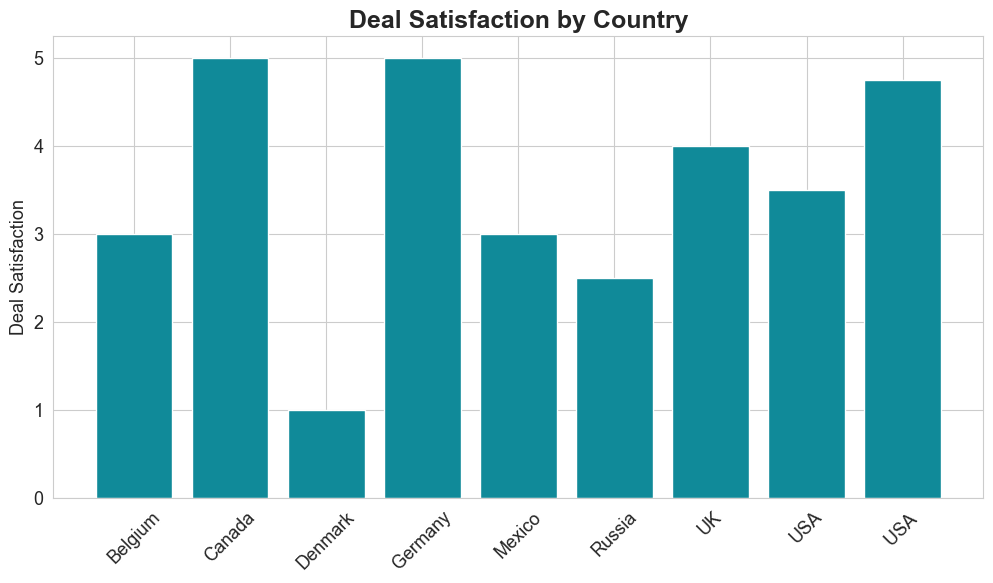

In [101]:
sns.set_style("whitegrid") 

plt.figure(figsize = (12, 6))
plt.bar(x = averages_by_country.index, #specify the x axis
        height = averages_by_country['deal_satisfaction'], #specify the y axis
        color = "#108A99") # the color for the bars (365 Data Science color)
# format the ticks
plt.xticks(rotation = 45, fontsize = 13) 
plt.yticks(fontsize = 13) 
plt.title("Deal Satisfaction by Country", fontsize = 18, fontweight = "bold") 
plt.ylabel("Deal Satisfaction", fontsize = 13 ) 

plt.show()

In [102]:
df.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


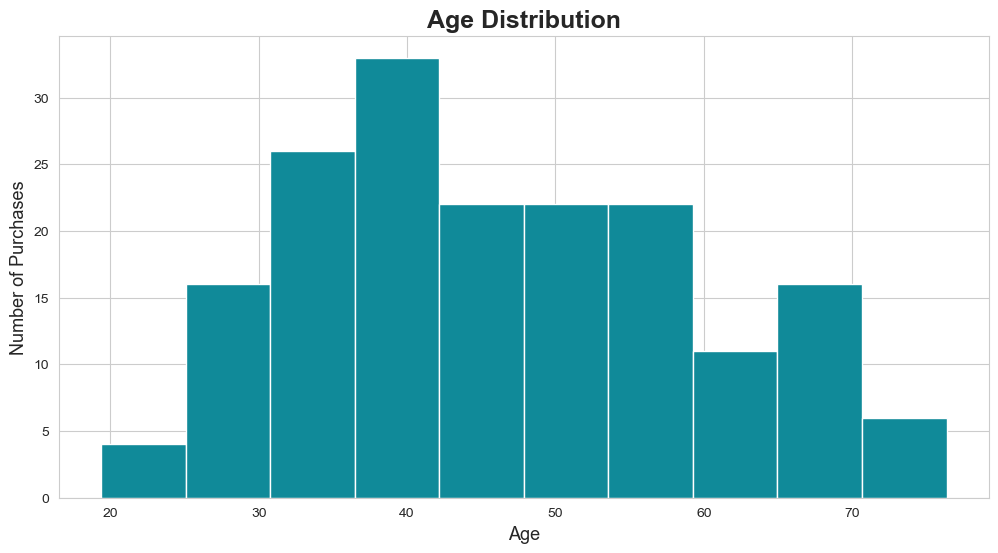

In [103]:
sns.set_style("whitegrid") 
plt.figure(figsize = (12, 6)) 

plt.hist(df['age_at_purchase'], # the variable on which to create the histogram
         bins = 10, # create a histogram with 10 bins
         color = "#108A99")
plt.title("Age Distribution", fontsize = 18, weight = "bold")
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Purchases", fontsize=13)

plt.show()

In [104]:
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,106,0.642424,0.642424
Nevada,17,0.103030,0.745455
Colorado,11,0.066667,0.812121
Oregon,11,0.066667,0.878788
Arizona,9,0.054545,0.933333
Utah,5,0.030303,0.963636
Virginia,4,0.024242,0.987879
Kansas,1,0.006061,0.993939
Wyoming,1,0.006061,1.000000


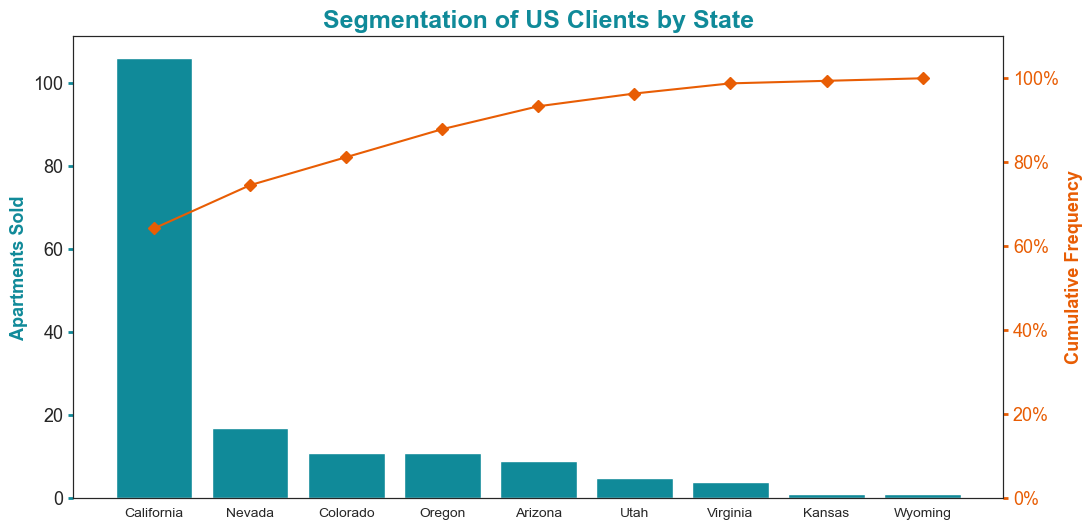

In [105]:
from matplotlib.ticker import PercentFormatter

sns.set_style("white") 

fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(sold_by_state.index,sold_by_state['frequency'],color = "#108A99")
ax.set_ylabel("Apartments Sold", weight='bold',fontsize = 13,color = "#108A99")
ax.tick_params(axis = "y", width = 2, labelsize = 13,color = "#108A99")

ax2 = ax.twinx()
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))
ax2.plot(sold_by_state.index,sold_by_state["cumulative_frequency"], color = "#E85D04", marker = "D")
ax2.set_ylabel("Cumulative Frequency", color = "#E85D04", weight = "bold",fontsize=13)
ax2.tick_params(axis = "y", colors = "#E85D04", width = 2, labelsize = 13)

ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#108A99")

plt.show()

In [106]:
df['year_sale'] = df['date_sale'].apply(lambda x: x.year)
df['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [107]:
df['year_sale'] = df['year_sale'].fillna(0).astype(int)
df['year_sale'] = df['year_sale'].replace({0:pd.NA})

In [108]:
columns_of_interest = ['year_sale','price$']
revenue_per_year = df[columns_of_interest].groupby('year_sale').sum()

revenue_per_year = revenue_per_year.rename(columns={'price$':'revenue$'})
revenue_per_year

,revenue$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


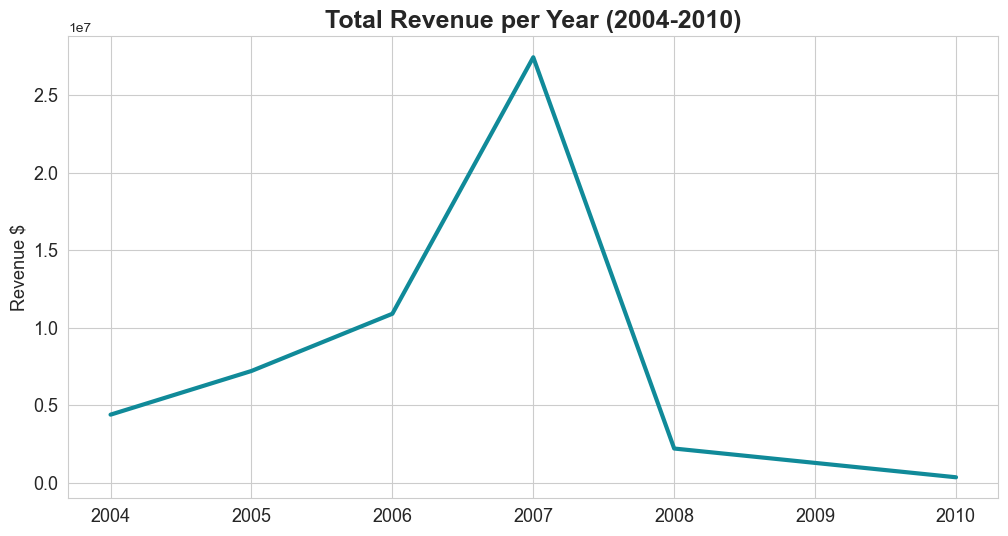

In [109]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 6))
plt.plot(revenue_per_year['revenue$'], color='#108A99', linewidth=3)

plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $", fontsize = 13)
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)

plt.show()

In [110]:
revenue_per_year['revenue$inM'] = revenue_per_year['revenue$'] / 1000000
revenue_per_year

,revenue$,revenue$inM
year_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [111]:
revenue_per_year_adj = revenue_per_year.copy()
new_row = pd.DataFrame([{'revenue$': 0, 'revenue$inM': 0}])
revenue_per_year_adj = pd.concat([revenue_per_year_adj, new_row], ignore_index=True)
revenue_per_year_adj.index = ['2004', '2005', '2006', '2007', '2008', '2010', '2009']
revenue_per_year_adj = revenue_per_year_adj.loc[['2004', '2005', '2006', '2007', '2008', '2009', '2010']]

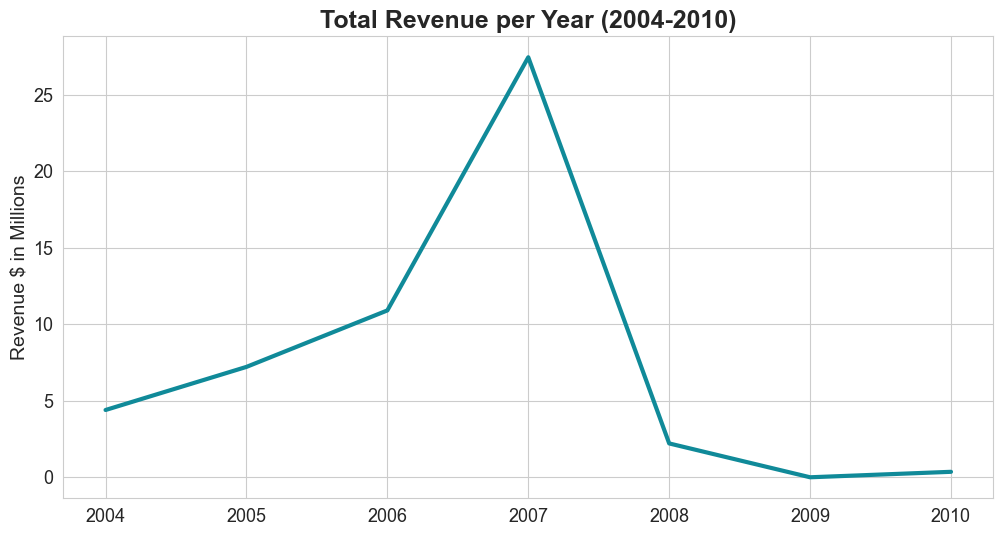

In [112]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 6))
plt.plot(revenue_per_year_adj['revenue$inM'], color='#108A99', linewidth=3)

plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $ in Millions", fontsize = 14)
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)

plt.show()

In [113]:
data_stacked_area = df.copy()

In [114]:
building_dummies = pd.get_dummies(data_stacked_area['building'])
building_dummies.head()

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False


In [115]:
data_stacked_area = pd.concat([data_stacked_area, building_dummies], axis=1)
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [116]:
data_stacked_area = data_stacked_area.rename(columns={'1':'building1','2':'building2','3':'building3','4':'building4','5':'building5'})
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [117]:
data_stacked_area = data_stacked_area[data_stacked_area['sold'] == 1]

In [118]:
columns_of_interest = ['year_sale','building1','building2','building3','building4','building5']
stacked_area = data_stacked_area[columns_of_interest].groupby('year_sale').sum()
stacked_area

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


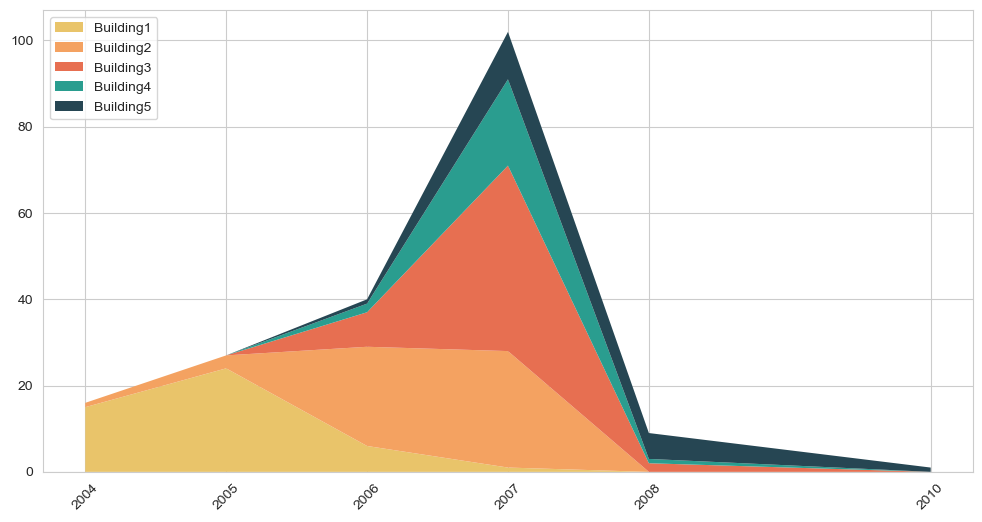

In [119]:
colors = ['#E9C46A', '#F4A261', '#E76F51', '#2A9D8F', '#264653']  # Add '#' to each hex color code
labels = ['Building1', 'Building2', 'Building3', 'Building4', 'Building5']
          
plt.figure(figsize=(12, 6))
plt.stackplot(
    stacked_area.index,
    stacked_area['building1'],
    stacked_area['building2'],
    stacked_area['building3'],
    stacked_area['building4'],
    stacked_area['building5'],
    colors=colors,
    edgecolor='none'
)

plt.xticks(stacked_area.index, rotation=45)
plt.legend(labels=labels, loc="upper left")
plt.show()


In [120]:
df.columns.array

<PandasArray>
[                     'id',                'building',
               'date_sale',                    'type',
               'property#',                    'area',
                    'sold',              'customerid',
                  'price$',                  'entity',
              'birth_date',                     'sex',
                 'country',                   'state',
                 'purpose',       'deal_satisfaction',
                'mortgage',                  'source',
               'full_name',         'age_at_purchase',
 'age_at_purchase_rounded',            'age_interval',
          'price_interval',               'year_sale']
Length: 24, dtype: object

In [121]:
df.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,entity,...,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004


In [127]:
bins = [0, 100000, 300000, 500000, 1000000, 5000000]
labels = ['<100k', '100k-300k', '300k-500k', '500k-1M', '1M+']
df['price_range'] = pd.cut(df['price$'], bins=bins, labels=labels)

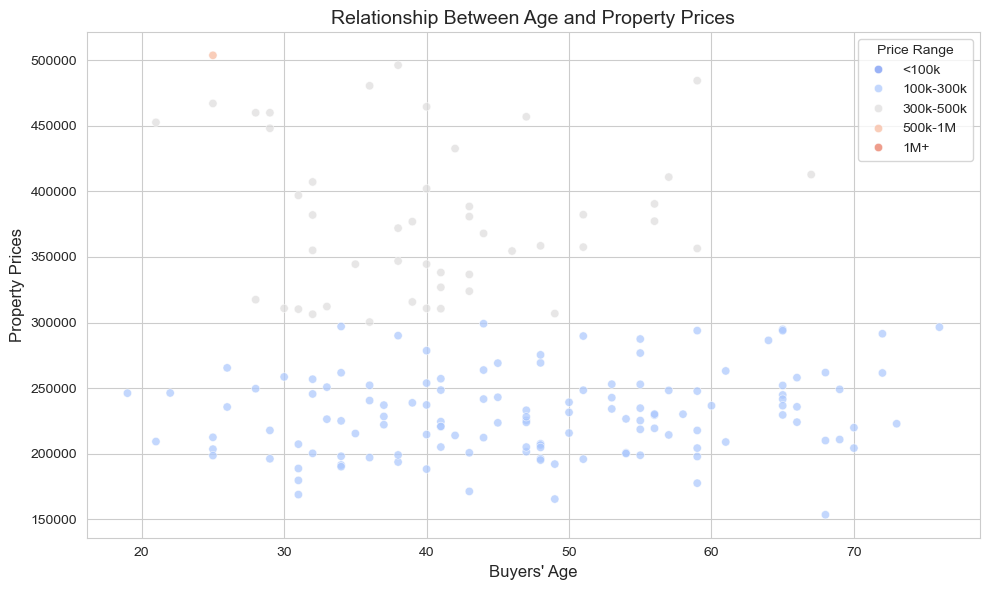

In [128]:
# Scatterplot showing the relationship between age and property prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_at_purchase_rounded', y='price$', data=df, hue='price_range', palette='coolwarm', alpha=0.7)
plt.title('Relationship Between Age and Property Prices', fontsize=14)
plt.xlabel('Buyers\' Age', fontsize=12)
plt.ylabel('Property Prices', fontsize=12)
plt.legend(title='Price Range', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

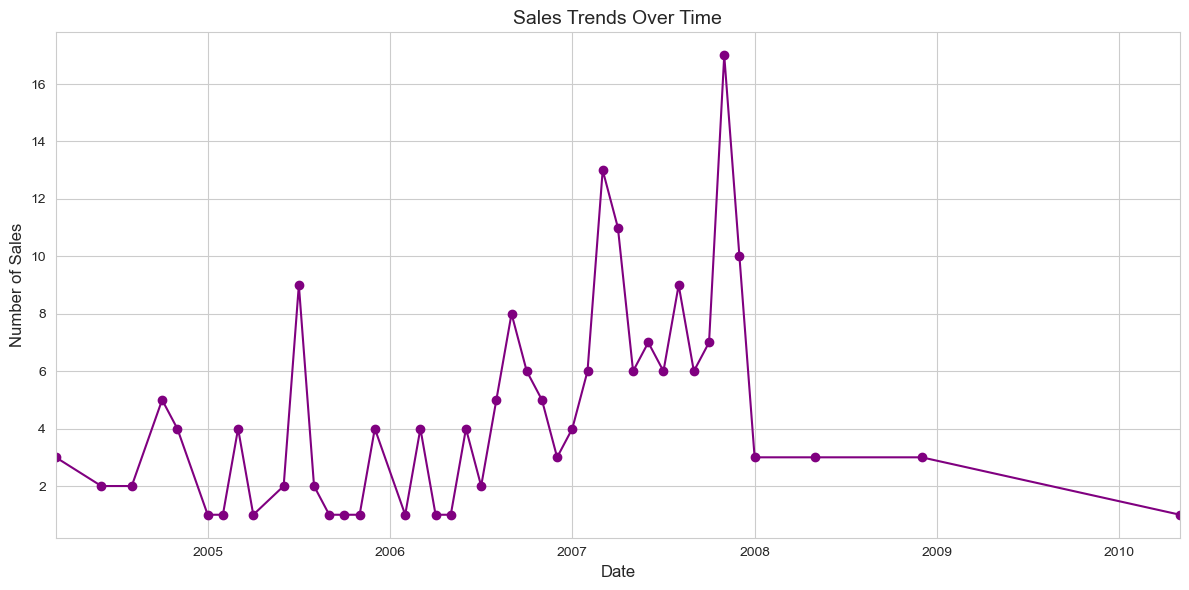

In [129]:
# Adding a new column for year and month of sale
df['date_sale'] = pd.to_datetime(df['date_sale'])
df['year_month'] = df['date_sale'].dt.to_period('M')

# Line plot showing sales trends over time
sales_over_time = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line', marker='o', color='purple')
plt.title('Sales Trends Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.tight_layout()
plt.show()

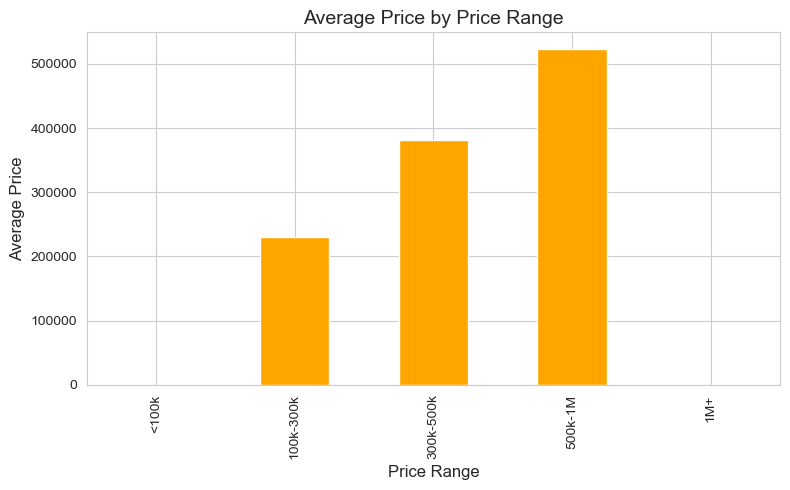

In [130]:
# Bar plot showing average price by price range
avg_price_by_range = df.groupby('price_range')['price$'].mean()

plt.figure(figsize=(8, 5))
avg_price_by_range.plot(kind='bar', color='orange')
plt.title('Average Price by Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.tight_layout()
plt.show()

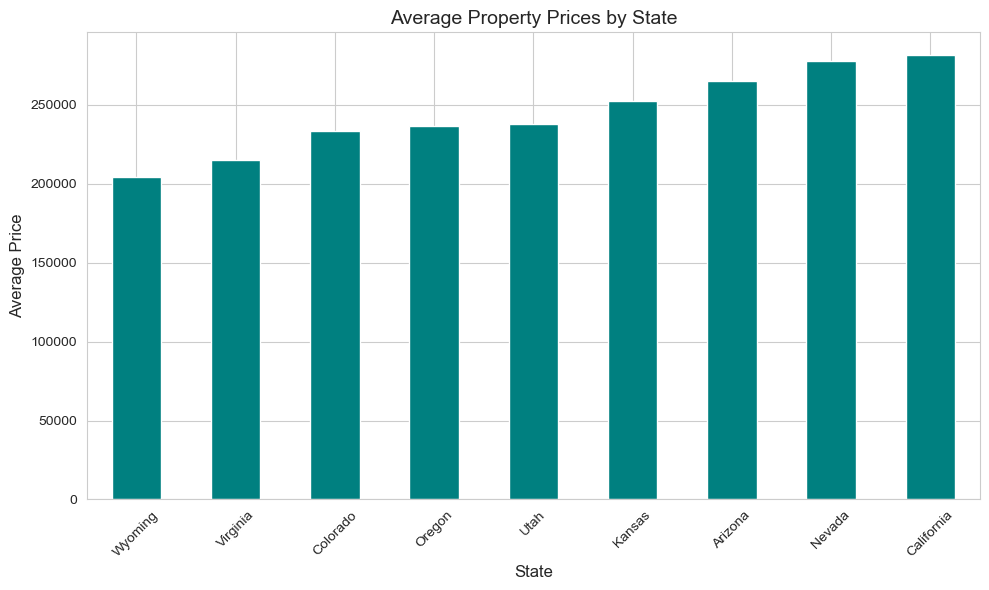

In [131]:
# Bar plot showing average property prices by state
avg_price_by_state = df.groupby('state')['price$'].mean()

plt.figure(figsize=(10, 6))
avg_price_by_state.sort_values().plot(kind='bar', color='teal')
plt.title('Average Property Prices by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()